In [1]:
# Import packages
import numpy as np
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from plotly import tools

import os
print (os.listdir("."))

['.ipynb_checkpoints', 'bi-gram.png', 'Copy_Main.py', 'dsa_text classification.ipynb', 'graph.png', 'Main.ipynb', 'main.py', 'rebel.png', 'SW_EpisodeIV.txt', 'SW_EpisodeV.txt', 'SW_EpisodeVI.txt', 'text_analytics_DSA.ipynb', 'text_postProcess.csv', 'text_processing.py', 'tri-gram.png', 'vader_newscript.png', 'wordcloud_masks', 'yoda.png', 'yoda_postProcess.csv']


In [ ]:
data_dir = '../data/starwars/'

### Data Loading

In [2]:
## DATA LOADING ##
episodeIV = pd.read_csv(f'{data_dir}SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
episodeV = pd.read_csv(f"{data_dir}SW_EpisodeV.txt", delim_whitespace = True, names=["index", "character", "dialogue"], header=None)
episodeVI = pd.read_csv(f"{data_dir}SW_EpisodeVI.txt", delim_whitespace = True, names=["index","character","dialogue"],header=None)

In [3]:
### Remove first row, remove column "index". So now we are left with character and dialogue.
episodeIV.drop(0,inplace=True)
episodeIV.head() # just to check we've removed the right row. 
episodeV.drop(0,inplace=True)
episodeVI.drop(0,inplace=True)

episodeIV.drop(["index"], axis = 1, inplace =True)
episodeV.drop(["index"], axis = 1, inplace = True)
episodeVI.drop(["index"], axis = 1, inplace = True)

episodeIV.head()

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...


In [4]:
## Tabulate number of unique character, calculate number of times each character has in each script.
script_numIV = pd.DataFrame(episodeIV.character.value_counts()).iloc[:20]
script_numV = pd.DataFrame(episodeV.character.value_counts()).iloc[:20]
script_numVI = pd.DataFrame(episodeVI.character.value_counts()).iloc[:20]

In [5]:
## Episode Names 
episodeIV["episode"] = "A New Hope"
episodeV["episode"] = "The Empire Strikes Back"
episodeVI["episode"] = "Return of the Jedi"
data = pd.concat([episodeIV, episodeV, episodeVI], axis = 0, ignore_index = True)
data

,character,dialogue,episode
0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
1,THREEPIO,We're doomed!,A New Hope
2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
3,THREEPIO,What's that?,A New Hope
4,THREEPIO,I should have known better than to trust the l...,A New Hope
5,LUKE,Hurry up! Come with me! What are you waiting...,A New Hope
6,THREEPIO,"Artoo! Artoo-Detoo, where are you?",A New Hope
7,THREEPIO,At last! Where have you been?,A New Hope
8,THREEPIO,They're heading in this direction. What are we...,A New Hope
9,THREEPIO,"Wait a minute, where are you going?",A New Hope


### TEXT PROCESSING

In [6]:
## TEXT PROCESSING ###
import re
import nltk as nlp
from nltk.corpus import stopwords
import wordcloud

In [7]:
from nltk.stem import PorterStemmer
e_words= ["possible", "possibly"]
ps = PorterStemmer()
for w in e_words:
    rootWord=ps.stem(w)
    print(rootWord)

possibl
possibl


In [8]:
## Create a new list
description_list = []
for description in data.dialogue:
    description = re.sub ("[^a-zA-Z]", " ", description) # match all strings that CONTAIN a NON-LETTER, convert them into blanks.
    description = description.lower() # Convert all strings to lower case.
    description = nlp.word_tokenize(description)
    description = [word for word in description if not word in set(stopwords.words("english"))] # remove stopwords
    lemma = nlp.WordNetLemmatizer() 
    description = [lemma.lemmatize(word) for word in description]
    description = " ".join(description) #This is similar to paste function in R. 
    description_list.append(description)

print(description_list[0:50])

['hear shut main reactor destroyed sure madness', 'doomed', 'escape princess time', '', 'known better trust logic half sized thermocapsulary dehousing assister', 'hurry come waiting get gear', 'artoo artoo detoo', 'last', 'heading direction going sent spice mine kessel smashed know', 'wait minute going', 'death star plan main computer', 'transmission intercepted', 'intercepted transmission aaah consular ship diplomatic mission', 'consular ship ambassador', 'commander tear ship apart found plan bring ambassador want alive', 'set stun', 'right inform lord vader prisoner', 'hey permitted restricted deactivated sure', 'call mindless philosopher overweight glob grease come somebody see', 'secret mission plan talking getting', 'going regret', 'go another one', 'hold fire life form must short circuited', 'funny damage look bad', 'sure thing safe', 'told kid slow', 'hear young noise blast', 'wormie another rampage', 'shape guy biggs', 'know back get', 'wanted surprise hot shot thought certainl

In [9]:
## Add the text after processing into the previous data
data["new_script"] = description_list
temp = data.head(50)
temp.to_csv("text_postProcess.csv", index = False)

## Filter the lines by Character
luke = data[data.character=="LUKE"]
yoda = data[data.character == "YODA"]
han = data[data.character == "HAN"]
vader = data[data.character == "VADER"]

In [10]:
yoda_postProcess = yoda
yoda_postProcess.to_csv("yoda_postProcess.csv", index = False)
vader

,character,dialogue,episode,new_script
11,VADER,Where are those transmissions you intercepted?,A New Hope,transmission intercepted
13,VADER,If this is a consular ship... where is the Amb...,A New Hope,consular ship ambassador
14,VADER,"Commander, tear this ship apart until you've f...",A New Hope,commander tear ship apart found plan bring amb...
42,VADER,"Don't play games with me, Your Highness. You ...",A New Hope,play game highness mercy mission time passed d...
44,VADER,You're a part of the Rebel Alliance... and a t...,A New Hope,part rebel alliance traitor take away
46,VADER,I have traced the Rebel spies to her. Now she...,A New Hope,traced rebel spy link find secret base
48,VADER,Leave that to me. Send a distress signal and ...,A New Hope,leave send distress signal inform senate aboar...
50,VADER,She must have hidden the plans in the escape p...,A New Hope,must hidden plan escape pod send detachment re...
286,VADER,The plans you refer to will soon be back in ou...,A New Hope,plan refer soon back hand
288,VADER,Don't be too proud of this technological terro...,A New Hope,proud technological terror constructed ability...


In [11]:
## Time to visualise the frequency of words 
wave_mask_yoda = np.array(Image.open("wordcloud_masks/yoda.png"))
wave_mask_vader = np.array(Image.open("wordcloud_masks/vader.png"))
wave_mask_rebel = np.array(Image.open("wordcloud_masks/rebel alliance.png"))
wave_mask_r2d2 = np.array(Image.open("wordcloud_masks/r2d2.png"))
wave_mask_lp = np.array(Image.open("wordcloud_masks/LesPossedes.png"))

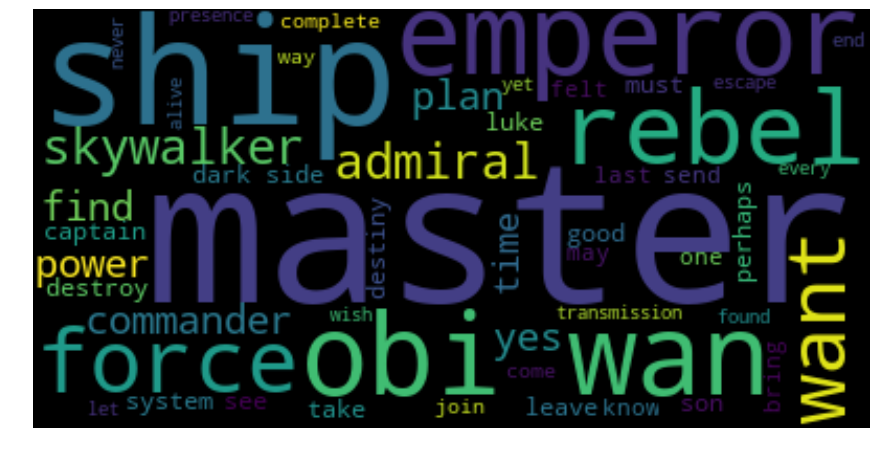

In [12]:
## VISUALISATION OF VADER ##
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
# Generate word cloud for vader.
wordcloud2 = WordCloud(random_state=21, max_words= 50).generate(" ".join(vader.new_script))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.savefig('vader_newscript.png')

plt.show()

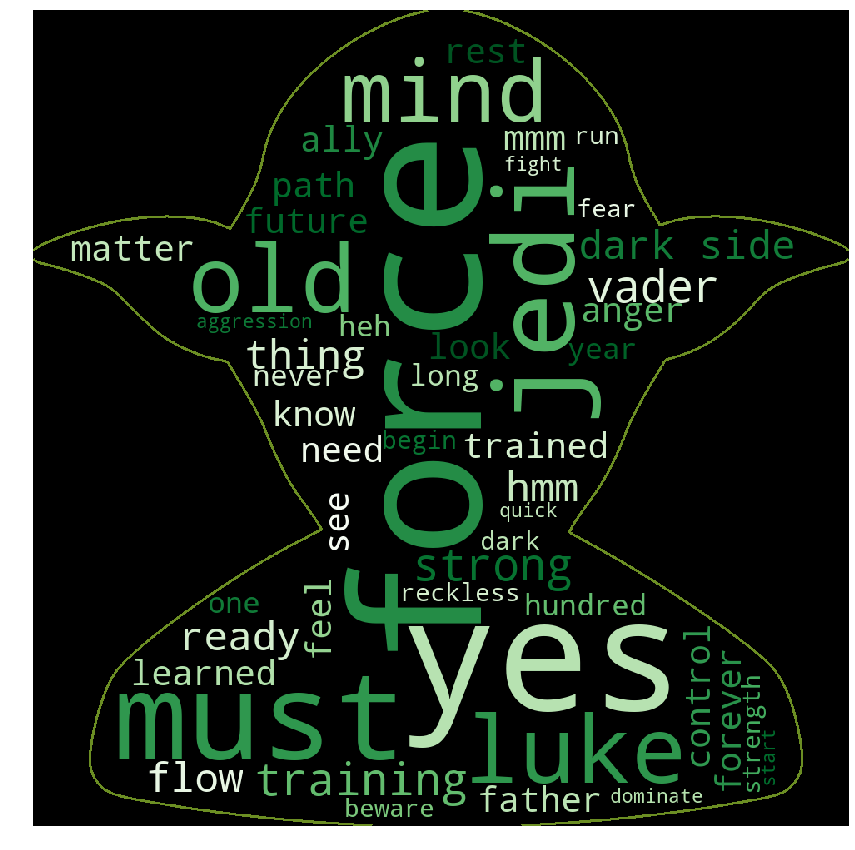

In [13]:
## VISUALISING YODA Scripts XD ###
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_yoda,background_color="black",contour_width=3, contour_color="olivedrab",colormap="Greens",
                      stopwords=stopwords,   
                      width=950,
                          height=950, max_words= 50
                         ).generate(" ".join(yoda.new_script))

plt.imshow(wordcloud)
plt.axis('off')
# plt.savefig('yoda.png')

plt.show()

In [14]:
## COUNT VECTORIZER ## 
from sklearn.feature_extraction.text import CountVectorizer # bag of words

# Most used 500 words
max_features = 500
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = 'english')

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x

print("mostly used {} words: {}".format(max_features,count_vectorizer.get_feature_names()))

mostly used 500 words: ['able', 'aboard', 'academy', 'admiral', 'afraid', 'ah', 'alderaan', 'alert', 'alive', 'alliance', 'allowed', 'ally', 'anger', 'apart', 'approaching', 'area', 'artoo', 'ask', 'asteroid', 'attack', 'away', 'bad', 'bargain', 'base', 'battle', 'beam', 'begin', 'beginning', 'believe', 'ben', 'best', 'better', 'big', 'biggs', 'bit', 'blast', 'blaster', 'block', 'board', 'bolt', 'bounty', 'boy', 'bring', 'broken', 'buddy', 'cable', 'calrissian', 'came', 'captain', 'care', 'careful', 'cave', 'cell', 'chance', 'check', 'chewbacca', 'chewie', 'choice', 'circuit', 'city', 'clear', 'clearance', 'close', 'closer', 'code', 'come', 'coming', 'command', 'commander', 'complete', 'computer', 'concern', 'contact', 'continue', 'control', 'copy', 'course', 'cover', 'crazy', 'crew', 'cruiser', 'cut', 'dack', 'dagobah', 'dangerous', 'dark', 'darth', 'data', 'day', 'deactivate', 'dead', 'deal', 'dear', 'death', 'defense', 'deflector', 'destiny', 'destroy', 'destroyed', 'destroyer', 'de

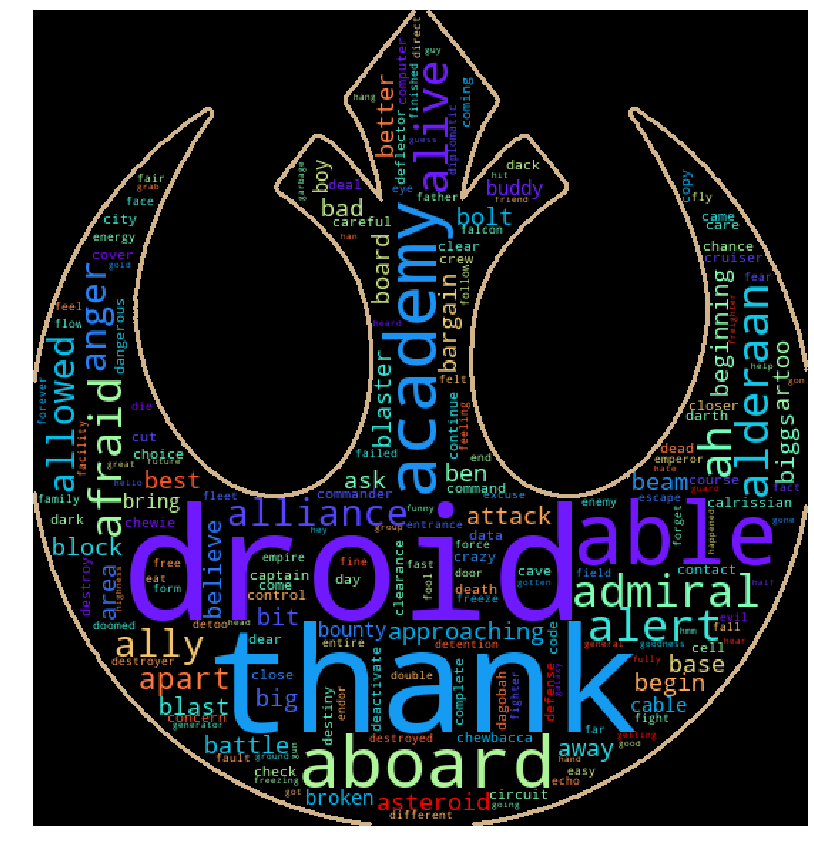

In [15]:
## Visualising most used 500 features
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask_rebel,background_color="black",contour_width=3, contour_color="tan",colormap="rainbow",  
                      width=950,
                          height=950
                         ).generate(" ".join(count_vectorizer.get_feature_names()))

plt.imshow(wordcloud)
plt.axis('off')
# plt.savefig('rebel.png')

plt.show()

### N-grams

In [36]:
import re
import nltk
from nltk.corpus import stopwords #To Remove the StopWords like "the","in" ect
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer #lemmatize the word for example "studies" and "studying" will be converted to "study"

In [38]:
### LINK here: https://www.kaggle.com/bhargavflash/star-wars-unigram-bigram-wordcloud-lda

## N-grams  
def ngrams(data,n):
    
    text = " ".join(data)
    text1 = text.lower() # convert to lower case
    text2 = re.sub(r'[^a-zA-Z]'," ",text1) # Removes all special characters, forward slash and punctuation. 
    # Lemmatisation and stopwords removal.
    text3 = " ".join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(text2) if word not in stopwords.words("english") and len(word) > 2])    # Tokenise 
    words = nltk.word_tokenize(text3)
    # Combine n-gram into list [(w1,w2,w3), (w2,w3,w4), (w3,w4,w5)]
    ngram = list(nltk.ngrams(words,n))
    
    return ngram


In [39]:
# Using the dialogue column, find bi-grams.
bigram = ngrams(data['dialogue'], 2)

In [40]:
## Tri-gram 
# Using the dialogue column, find tri-grams.
trigram = ngrams(data['dialogue'],3)

In [41]:
bigram[1:10]
# len(bigram)

[('shut', 'main'),
 ('main', 'reactor'),
 ('reactor', 'destroyed'),
 ('destroyed', 'sure'),
 ('sure', 'madness'),
 ('madness', 'doomed'),
 ('doomed', 'escape'),
 ('escape', 'princess'),
 ('princess', 'time')]

In [42]:
# combine the two words
"_".join(bigram[0])

'hear_shut'

In [43]:
# Join all bi-gram in the list
for i in range(0, len(bigram)):
    bigram[i] = "_".join(bigram[i])

In [44]:
Bigram_freq = nltk.FreqDist(bigram)
Bigram_freq

FreqDist({'obi_wan': 30, 'lord_vader': 26, 'master_luke': 24, 'dark_side': 20, 'luke_luke': 19, 'death_star': 15, 'light_speed': 15, 'come_back': 13, 'look_like': 13, 'battle_station': 12, ...})

(-0.5, 543.5, 572.5, -0.5)

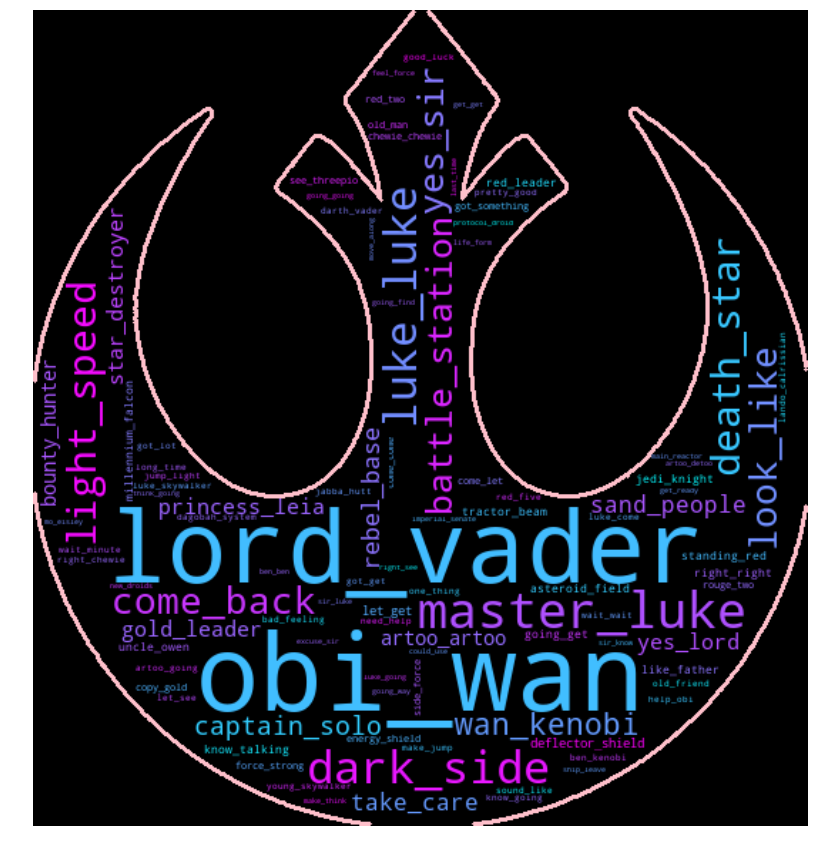

In [45]:
## Bi-gram Visualisation

plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_rebel,background_color="black",contour_width=3, contour_color="pink",colormap="cool_r",
                      stopwords=stopwords, width=950, height=950, max_words= 100).generate_from_frequencies(Bigram_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('bi-gram.png')

In [46]:
## Combine the trigrams
tri_gram = "_".join(trigram[0])
tri_gram

'hear_shut_main'

In [47]:
# Join all trigram in a list
for i in range(0, len(trigram)):
    trigram[i] = "_".join(trigram[i])

In [55]:
## Calculate the most occuring tri-grams 
Trigram_freq = nltk.FreqDist(trigram)
Trigram_freq

FreqDist({'obi_wan_kenobi': 12, 'luke_luke_luke': 7, 'dark_side_force': 6, 'help_obi_wan': 5, 'jump_light_speed': 5, 'copy_gold_leader': 5, 'make_jump_light': 4, 'power_dark_side': 4, 'see_threepio_human': 3, 'wan_kenobi_hope': 3, ...})

(-0.5, 543.5, 572.5, -0.5)

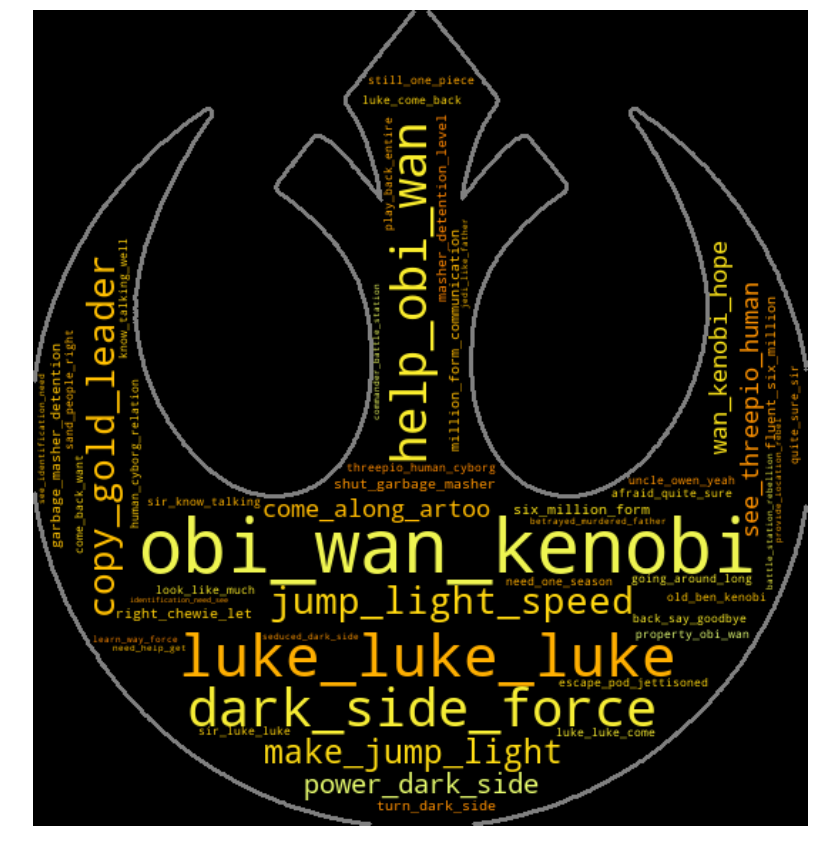

In [60]:
# VISUALISATION OF TRI-GRAMS
plt.subplots(figsize=(15,15))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_rebel,background_color="black",contour_width=2, contour_color="gray",colormap="Wistia_r",
                      stopwords=stopwords, width=950, height=950, max_words= 50).generate_from_frequencies(Trigram_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('tri-gram.png')

### LDA (Latent Dirichlet Allocation)

LDA is a model used to measure similarities between phrases (BOW). LDA is often used to do <b>topic modelling</b>, where  <strong><em>high number of features get reduced in dimensions</em></strong> into <b>Themes</b>, where they become useful building block or gist over time

In [69]:
from nltk.corpus import stopwords

In [66]:
lda_data = []
for i in range(0,len(data)):
    lda_data.append(data.iloc[i,]['dialogue'])


In [67]:
import string
exclude = set(string.punctuation) # Punctuations
def clean_doc(doc):
    # Remove stopwords
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords.words("english")])
    # Remove punctuations
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # Normalisation
    normalized = " ".join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(punc_free)]) 
    return normalized


In [70]:
# Apply cleaning function in the data file
doc_clean = [clean_doc(doc).split() for doc in lda_data] 
doc_clean[0]

['hear',
 'that',
 'theyve',
 'shut',
 'main',
 'reactor',
 'well',
 'destroyed',
 'sure',
 'madness']

In [ ]:
## Creating bag of words
import gensim
from gensim import corpora

In [ ]:
#Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)
#Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
dtm = [dictionary.doc2bow(doc) for doc in doc_clean]